<a href="https://colab.research.google.com/github/meleknurb/pytorch_capstone_projects/blob/main/Analyzing_Health_Factors_Predicting_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Health Factors - Predicting Diabetes

In this project, we'll explore how various health-related factors contribute to diabetes. We'll use a subset of a real-world dataset from the CDC ([available here](https://www.cdc.gov/brfss/annual_data/annual_2015.html)) that contains medical and lifestyle information of adults in the United States. Specifically, the dataset was collected by the Behavioral Risk Factor Surveillance System (BRFSS), which conducts health-related telephone surveys across all 50 states and other US territories.

The goal of this project is to build and train a neural network with PyTorch for the following task:

 **Classification to Predict Diabetes**

- Chronic diseases like diabetes are among the leading causes of death worldwide. Early detection is crucial for timely intervention to allow health professionals to provide treatments such as lifestyle modification, prescribing medication, and resource planning. By building a classification model to predict diabetes using easily measurable health factors obtained via telephone screening, we hope to assist health professionals in identifying individuals who may be at high risk of developing diabetes before a formal diagnosis.

This predictive task can offer insights into how machine learning models can assist health professionals in detecting diseases and health problems early on, creating timely treatment plans, and improving health outcomes.

**Note:** The models and analyses in this project notebook are built and trained on a limited dataset that may not be generalized well to the broader population or clinical settings. Therefore, the models are not intended for real-world medical applications and should not be relied upon for diagnosing, predicting, or managing diabetes or any other health outcomes. Any health-related decisions should always be made with the guidance of a qualified healthcare professional!

#### **Dataset Column Summary**

- **Diabetes:** Whether the individual has "No Diabetes", "Prediabetes", or "Diabetes"
- **HighBP:** Whether the individual has high blood pressure ("Yes" or "No")
- **HighChol:** Whether the individual has high cholesterol ("Yes" or "No")
- **CholCheck:** Whether the individual had their cholesterol checked in the past 5 years ("Yes" or "No")
- **BMI:** Body Mass Index, a measure of body fat based on height and weight
- **Smoker:** Whether the individual is a current smoker ("Yes" or "No")
- **Stroke:** Whether the individual has ever had a stroke ("Yes" or No")
- **HeartDiseaseorAttack:** Whether the individual has ever had coronary heart disease or a heart attack ("Yes" or "No")
- **PhysActivity:** Whether the individual engaged in physical activity in the past 30 days ("Yes" or "No")
- **Fruits:** Whether the individual consumes fruits at least once per day ("Yes" or "No")
- **Veggies:** Whether the individual consumes vegetables at least once per day ("Yes" or "No")
- **HvyAlcoholConsump:** Heavy alcohol consumption indicator ("Yes" or "No")
AnyHealthcare: Whether the individual has any form of healthcare coverage ("Yes" or "No")
- **NoDocbcCost:** Whether the individual could not see a doctor in the past year because of cost ("Yes" or "No")
- **GenHlth:** General health status reported on a 1–5 scale (1 = excellent, 5 = poor)
- **MentHlth:** Number of days mental health was not good during the past 30 days
- **PhysHlth:** Number of days physical health was not good during the past 30 days
- **DiffWalk:** Whether the individual has serious difficulty walking or climbing stairs ("Yes" or "No")
- **Sex:** Female or Male
- **Age:** Age group of the individual (13-level group)
- **Education:** Education level attained
- **Income:** Income category of the individual



---



## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import f_oneway,chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

%matplotlib inline
warnings.filterwarnings('ignore')



---



## Loading and Inspecting the Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pytorch Capstone Projects/datasets/diabetes_BRFSS2015.csv')
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,Yes,Yes,Yes,40.0,Yes,No,No,No,No,Yes,...,No,5.0,18.0,15.0,Yes,Female,60-64,Grade 12 or GED (High school graduate),"Less than $20,000",No Diabetes
1,No,No,No,25.0,Yes,No,No,Yes,No,No,...,Yes,3.0,0.0,0.0,No,Female,50-54,College 4+ years (College graduate),"Less than $10,000",No Diabetes
2,Yes,Yes,Yes,28.0,No,No,No,No,Yes,No,...,Yes,5.0,30.0,30.0,Yes,Female,60-64,Grade 12 or GED (High school graduate),"$75,000 or more",No Diabetes
3,Yes,No,Yes,27.0,No,No,No,Yes,Yes,Yes,...,No,2.0,0.0,0.0,No,Female,70-74,Grades 9-11 (Some high school),"Less than $50,000",No Diabetes
4,Yes,Yes,Yes,24.0,No,No,No,Yes,Yes,Yes,...,No,2.0,3.0,0.0,No,Female,70-74,College 1-3 years (Some college/technical school),"Less than $25,000",No Diabetes


In [ ]:
df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes'],
      dtype='object')

In [ ]:
df.shape # 253,680 rows and 22 columns

(253680, 22)

In [ ]:
df.isnull().sum().sum()

np.int64(0)

There is no missing data in the data set.

In [ ]:
df.duplicated().sum()

np.int64(23899)

The dataset contains 23,899 duplicated entries. These duplicates will be removed to ensure data integrity and prevent potential biases in subsequent analyses and model training.

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                229781 non-null  object 
 1   HighChol              229781 non-null  object 
 2   CholCheck             229781 non-null  object 
 3   BMI                   229781 non-null  float64
 4   Smoker                229781 non-null  object 
 5   Stroke                229781 non-null  object 
 6   HeartDiseaseorAttack  229781 non-null  object 
 7   PhysActivity          229781 non-null  object 
 8   Fruits                229781 non-null  object 
 9   Veggies               229781 non-null  object 
 10  HvyAlcoholConsump     229781 non-null  object 
 11  AnyHealthcare         229781 non-null  object 
 12  NoDocbcCost           229781 non-null  object 
 13  GenHlth               229781 non-null  float64
 14  MentHlth              229781 non-null  float64
 15  PhysH

**Initial observations:**
- The data types appear generally correct for the variables but in the feature transformation step we will convert all object columns for the model to their numerical equivalents.

In [ ]:
df.describe(include="object")

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex,Age,Education,Income,Diabetes
count,229781,229781,229781,229781,229781,229781,229781,229781,229781,229781,229781,229781,229781,229781,229781,229781,229781,229781
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,13,6,8,3
top,No,No,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,No,Female,60-64,College 4+ years (College graduate),"$75,000 or more",No Diabetes
freq,125359,128273,220483,122781,219497,206064,168511,140848,182633,215831,217390,208455,187155,128854,29736,88443,71818,190055


Looking at the summary statistics for the object data type columns:

- Many columns are binary ('Yes'/'No'), such as ``'HighBP', 'HighChol', 'Smoker'``, etc.
- The ``'Age', 'Education', and 'Income'`` columns have multiple unique categories (13, 6, and 8 respectively), indicating they are categorical but not binary.
- The 'top' and 'freq' values reveal the most frequent category and its count for each column. This highlights  ``class imbalance`` in several features, notably in **'Diabetes'** ('No Diabetes' is the most frequent), **'CholCheck'** **'Stroke'**, **'HeartDiseaseorAttack'**, **'HvyAlcoholConsump'**, **'AnyHealthcare'**, **'NoDocbcCost'** and **'Age'** where one category significantly outweighs the others.  This imbalance should be considered during model training.

In [ ]:
df.describe(include=np.number)

,BMI,GenHlth,MentHlth,PhysHlth
count,229781.00000,229781.000000,229781.000000,229781.000000
mean,28.68567,2.601151,3.505373,4.675178
std,6.78636,1.064685,7.713725,9.046568
min,12.00000,1.000000,0.000000,0.000000
25%,24.00000,2.000000,0.000000,0.000000
50%,27.00000,3.000000,0.000000,0.000000
75%,32.00000,3.000000,2.000000,4.000000
max,98.00000,5.000000,30.000000,30.000000


The `describe()` output for numerical columns (BMI, GenHlth, MentHlth, PhysHlth) provides insights into their distribution:

- **BMI:** The mean BMI is around 28.4, with a standard deviation of 6.6. The range is quite wide, from 12 to 98, indicating some potential outliers or a diverse population in terms of BMI. The 25th, 50th (median), and 75th percentiles suggest a right-skewed distribution.
- **GenHlth:** This column, representing general health on a scale of 1 to 5, has a mean of about 2.5. The values range from 1 to 5, as expected. The median is 2, suggesting that a significant portion of the population reports good to very good general health.
- **MentHlth and PhysHlth:** These columns represent the number of days mental and physical health were not good in the past 30 days, respectively. Both have a minimum of 0 and a maximum of 30. The means (around 3.2 for MentHlth and 4.2 for PhysHlth) and standard deviations (7.4 and 8.7) indicate a skewed distribution, with many people reporting 0 bad days and a long tail towards higher numbers of bad days. This suggests that while most people report good mental and physical health, a smaller group experiences a significant number of days with poor health.



---



## Exploratory Data Analysis

### Target Variable Distribution

In [ ]:
df["Diabetes"].value_counts()

,count
Diabetes,
No Diabetes,190055
Diabetes,35097
Prediabetes,4629


As observed from the distribution of the target variable, the **'Prediabetes'** class has a significantly lower number of instances (4629) compared to 'No Diabetes' (190055) and 'Diabetes' (35097). This extreme **class imbalance** for the 'Prediabetes' category poses a significant challenge for training a robust classification model that can accurately predict all three classes. To simplify the problem and potentially improve the model's ability to distinguish between the more represented classes, we will proceed by removing the 'Prediabetes' class from the dataset and focusing on a **binary classification problem** ('No Diabetes' vs 'Diabetes').

In [ ]:
# Remove rows with 'Prediabetes' from the dataset
df = df[df['Diabetes'] != 'Prediabetes'].copy()

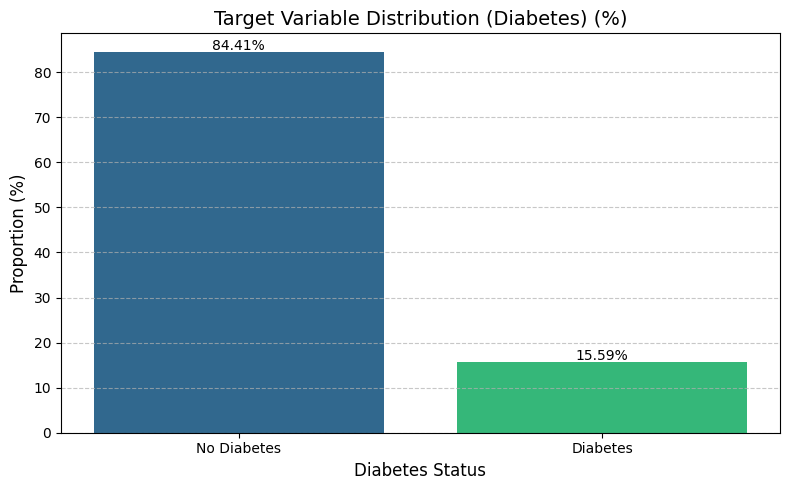

In [ ]:
# Calculate the proportions of the classes
diabetes_counts = df['Diabetes'].value_counts(normalize=True) * 100

# Get colors from the 'viridis' palette
colors = sns.color_palette('viridis', len(diabetes_counts))

# Bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(diabetes_counts.index, diabetes_counts, color=colors)

# Write percentages above the bars
for bar, percentage in zip(bars, diabetes_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{percentage:.2f}%', ha='center', fontsize=10)

# Graph settings
plt.title('Target Variable Distribution (Diabetes) (%)', fontsize=14)
plt.xlabel('Diabetes Status', fontsize=12)
plt.ylabel('Proportion (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The bar chart clearly illustrates the distribution of the target variable, `'Diabetes'`. As observed in the descriptive statistics and now visually confirmed:

- The majority of individuals in the dataset fall into the `'No Diabetes'` category, accounting for **over 84%** of the data.
- The `'Diabetes'` category represents approximately **15.5%** of the dataset.

This significant **class imbalance** in the target variable is evident. In order to overcome this imbalance and ensure that our model classifies both classes correctly, I plan to use **resampling techniques**, specifically **SMOTE-ENN**. This method combines oversampling the minority class (``'Diabetes'``) by creating synthetic examples (SMOTE) and undersampling the majority class (``'No Diabetes'``) by removing noisy examples (ENN), effectively balancing the class distribution in the training data.

We will also focus on evaluation metrics like `F1-score, precision, recall, and ROC-AUC`, which are more informative than simple accuracy in the presence of class imbalance.

###  Exploratory Analysis of Continuous Variables

In [ ]:
continuous_columns = ['BMI', 'MentHlth', 'PhysHlth'] # 'GenHlth' is not included as it represents categorical data on a scale of 1 to 5.

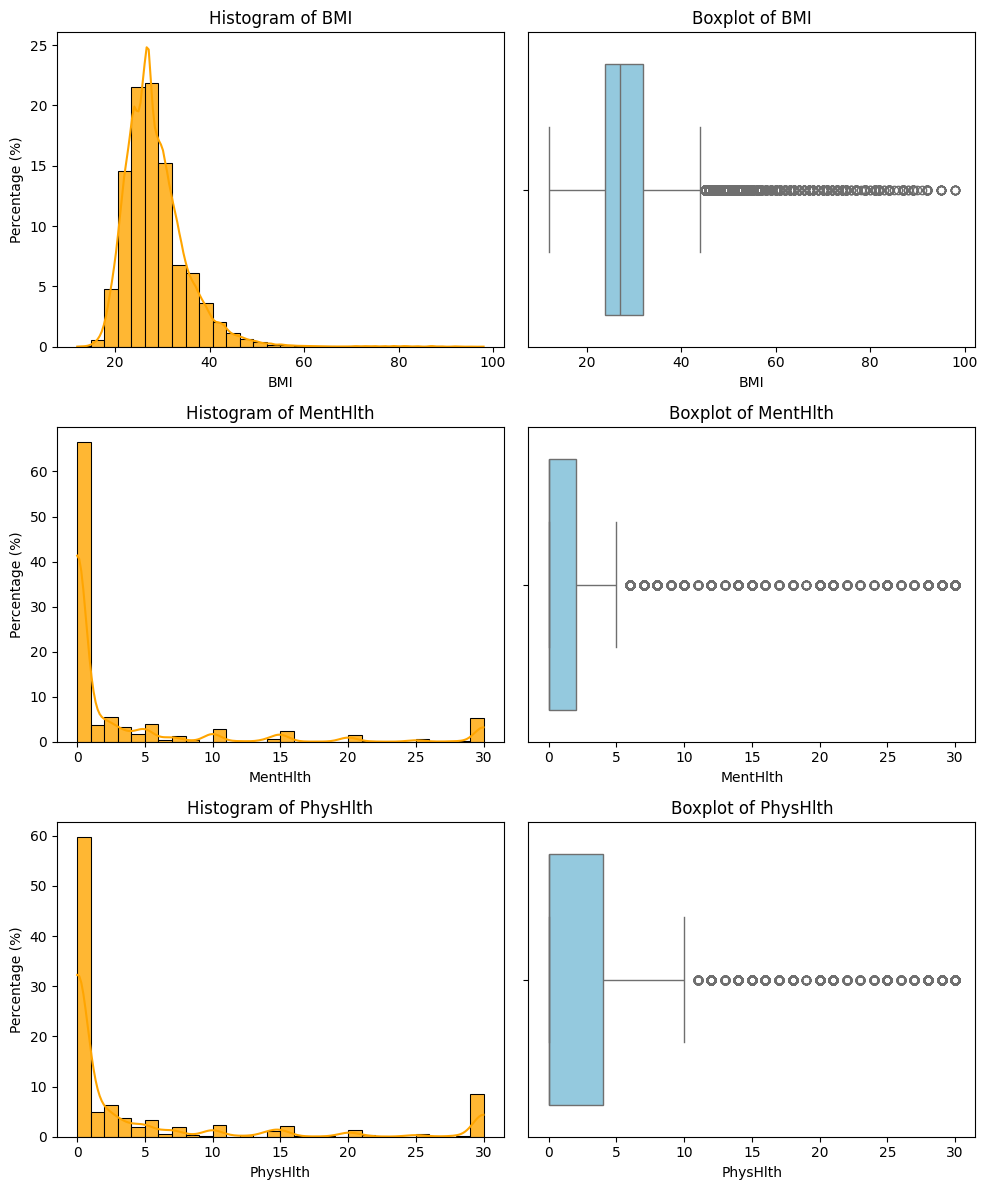

In [ ]:
# visualization of continuous columns

fig, axes = plt.subplots(len(continuous_columns), 2, figsize=(10, len(continuous_columns) * 4))

for i, column in enumerate(continuous_columns):
    # Histogram
    sns.histplot(df[column], kde=True,stat="percent", ax=axes[i, 0], color='orange',edgecolor = 'black',bins=30,alpha=0.8)
    axes[i, 0].set_title(f'Histogram of {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Percentage (%)')

    # Boxplot
    sns.boxplot(x=df[column], ax=axes[i, 1], color='skyblue')
    axes[i, 1].set_title(f'Boxplot of {column}')
    axes[i, 1].set_xlabel(column)

plt.tight_layout()
plt.show()

Based on the analysis of histograms and box plots of the continuous variables (`BMI`, `MentHlth`, and `PhysHlth`), the following observations were made:

**Distributions:**
- **BMI:** The histogram for BMI shows a distribution that is somewhat close to normal but exhibits a slight right skew, with the majority of values concentrated between 20 and 40.
- **MentHlth and PhysHlth:** Both `MentHlth` and `PhysHlth` display highly skewed distributions, with a strong concentration of values at 0. This indicates that a large portion of the population reported zero days of poor mental or physical health. The distributions have a long tail extending towards higher values, reflecting that while many people have good health, a smaller group experiences a significant number of days with poor health.

**Outliers:**
- **BMI:** The boxplot for BMI clearly shows a number of outliers on the higher end, indicating individuals with significantly high BMI values compared to the rest of the dataset.
- **MentHlth and PhysHlth**: The boxplots for both MentHlth and PhysHlth show many outliers, especially towards the maximum value of 30 days. This means that while most people reported few or no days with poor mental or physical health, a smaller group reported a high number of such days, and these appear as outliers in the boxplots.

Considering the nature of this health survey data, these outliers in BMI, MentHlth, and PhysHlth likely represent genuine variations in the population's health status rather than data entry errors. Therefore, directly removing these outliers might lead to a loss of valuable information about individuals experiencing significant health challenges.

 To address this and reduce the impact of outliers on model performance, I plan to use **RobustScaler** in the preprocessing step. RobustScaler is more robust to outliers than other scaling methods such as ``Min-Max normalization and Standardization (StandardScaler)`` as it uses median and interquartile range (IQR) to scale the data. In this way, a more reliable scaling can be performed in columns where outliers are dense.

In [ ]:
skewness_results = {}
for col in continuous_columns:
    skewness_results[col] = df[col].skew()

skewness_df = pd.DataFrame.from_dict(skewness_results, orient='index', columns=['Skewness'])
display(skewness_df)

,Skewness
BMI,2.077166
MentHlth,2.558746
PhysHlth,2.059639


All three continuous variables exhibit significant positive skewness (right skew), as indicated by values greater than 1. This confirms the visual observations from the histograms and box plots, where the distributions were concentrated towards lower values with a long tail extending to the right. `MentHlth` shows the highest degree of skewness.

While deep learning models can often handle some degree of skewness, the presence of significant skewness and outliers in these variables reinforces the decision to use `RobustScaler` in the preprocessing step. `RobustScaler`, by using the median and interquartile range, is less affected by these extreme values and can provide a more reliable scaling for these skewed distributions compared to methods that rely on the mean and standard deviation.

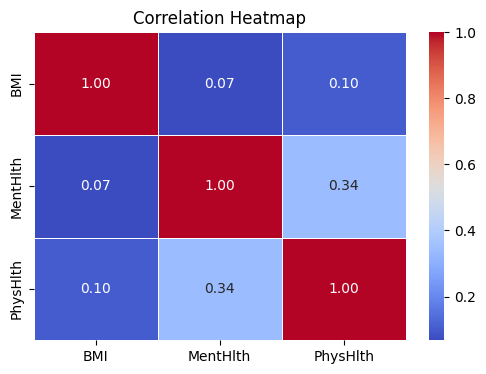

In [ ]:
# Calculate the correlation matrix for continuous columns
correlation_matrix = df[continuous_columns].corr()

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=0)
plt.show()

The correlation heatmap for the continuous variables (`BMI`, `MentHlth`, and `PhysHlth`) shows the linear relationships between these features:

- `BMI` has a very weak positive correlation with `MentHlth` (0.07) and a weak positive correlation with `PhysHlth` (0.10).
- `MentHlth` and `PhysHlth` have a moderate positive correlation (0.34), suggesting that poor mental and physical health days are somewhat related.

Overall, the correlations between these continuous variables are weak to moderate.

In [ ]:
target = 'Diabetes'

print("ANOVA Test Results between Continuous Columns and Target Variable:")

for col in continuous_columns:
    grouped_data = [df[col][df[target] == cls] for cls in df[target].unique()]
    f_statistic, p_value = f_oneway(*grouped_data)

    print(f"\nColumn: {col}")
    print(f"  F-Statistic: {f_statistic:.4f}")
    print(f"  P-Value: {p_value:.4f}")

    alpha = 0.05 # significant threshold
    if p_value < alpha:
        print("  --> There is a statistically significant difference (Null hypothesis rejected).")
    else:
        print("  --> There is no statistically significant difference (Null hypothesis could not be rejected).")

ANOVA Test Results between Continuous Columns and Target Variable:

Column: BMI
  F-Statistic: 10447.3032
  P-Value: 0.0000
  --> There is a statistically significant difference (Null hypothesis rejected).

Column: MentHlth
  F-Statistic: 719.0247
  P-Value: 0.0000
  --> There is a statistically significant difference (Null hypothesis rejected).

Column: PhysHlth
  F-Statistic: 5955.0209
  P-Value: 0.0000
  --> There is a statistically significant difference (Null hypothesis rejected).


When the results of ANOVA tests performed to examine the relationship between continuous variables and the target variable (``Diabetes``) are analyzed, it is seen that the P-values for all continuous variables (`BMI`, `MentHlth`, and `PhysHlth`) are much lower than the 0.05 significance level (alpha).

These results show that there are ``statistically significant differences`` between the means of all continuous variables according to different diabetes statuses:

**Model Significance:**

The ANOVA test results suggest that all continuous variables analyzed are potentially important features in predicting diabetes status. The fact that the p-values are so low suggests that each variable has a statistically significant contribution in distinguishing between different diabetes groups.

This finding confirms that these continuous variables will be valuable inputs for our classification model. Our model will be able to learn to distinguish between different diabetes statuses using the differences in these variables.

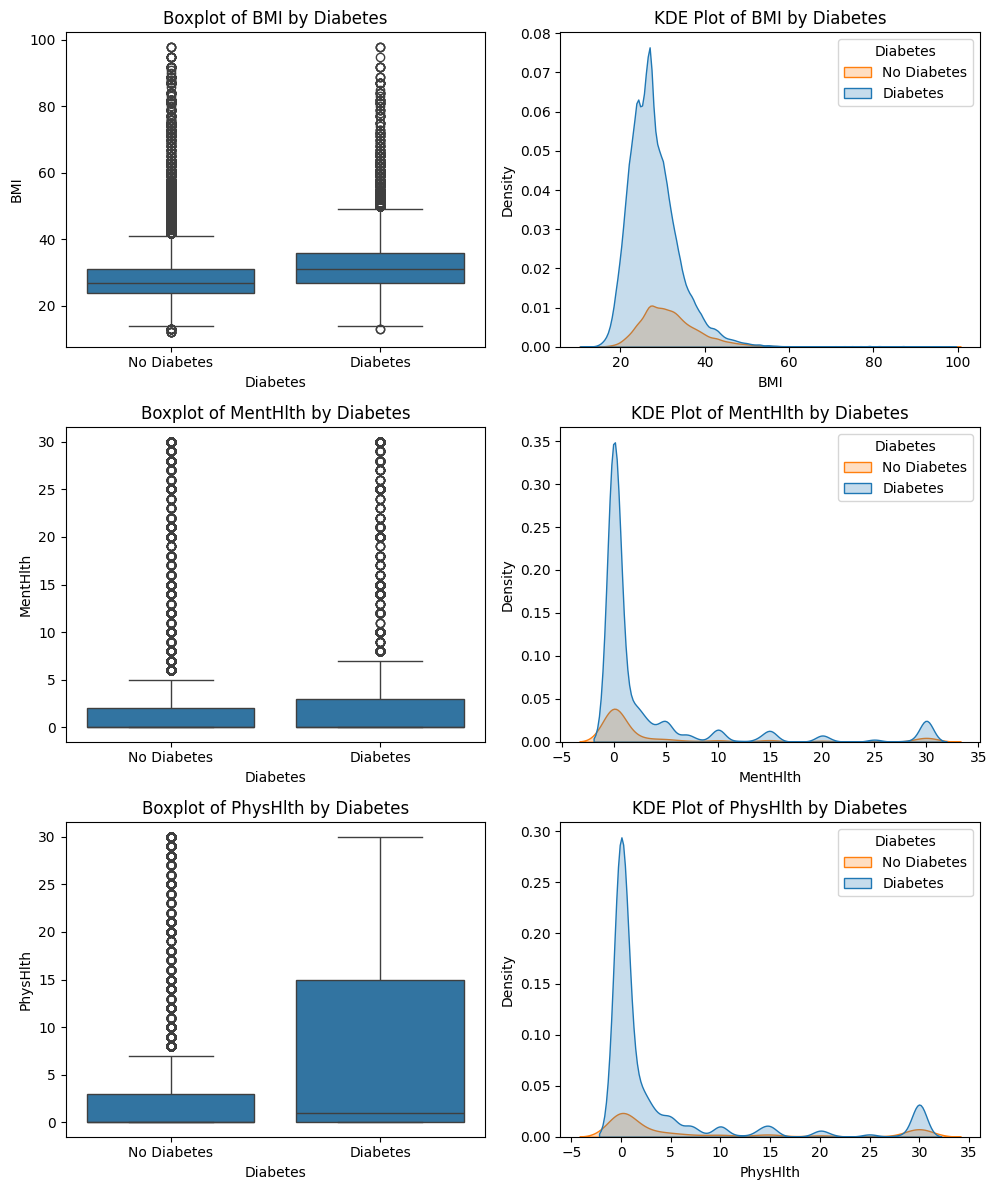

In [ ]:
fig, axes = plt.subplots(len(continuous_columns), 2, figsize=(10, len(continuous_columns) * 4))

for i, col in enumerate(continuous_columns):
    # Boxplot
    sns.boxplot(x=target, y=col, data=df, ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot of {col} by {target}')
    axes[i, 0].set_xlabel(target)
    axes[i, 0].set_ylabel(col)

    # KDE Plot
    sns.kdeplot(data=df, x=col, hue=target, ax=axes[i, 1], fill=True)
    axes[i, 1].set_title(f'KDE Plot of {col} by {target}')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Density')
    axes[i, 1].legend(title=target, labels=df[target].unique())


plt.tight_layout()
plt.show()

Examining the boxplots and KDE plots showing the distribution of continuous variables ``(BMI, MentHlth, PhysHlth)`` by diabetes status:

* **BMI:** The median and distribution are significantly higher in the "Diabetes" group than in the "No Diabetes" group. A higher BMI is associated with diabetes.
* **MentHlth:** Higher MentHlth values ​​(more days of poor mental health) were observed in the "Diabetes" group. Poor mental health appears to be associated with diabetes.
* **PhysHlth:** Higher PhysHlth values ​​(more days of poor physical health) were observed in the "Diabetes" group. Poor physical health appears to be associated with diabetes.

**Analysis Result:**

All three continuous variables show a significant association with diabetes status. It is clear that individuals with diabetes have a higher BMI on average and report more days of poor mental/physical health. These visual analyses support the ANOVA test results and confirm that these variables are important for diabetes prediction.


### Exploratory Analysis of Categorical Variables

In [ ]:
categorical_columns = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke','HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

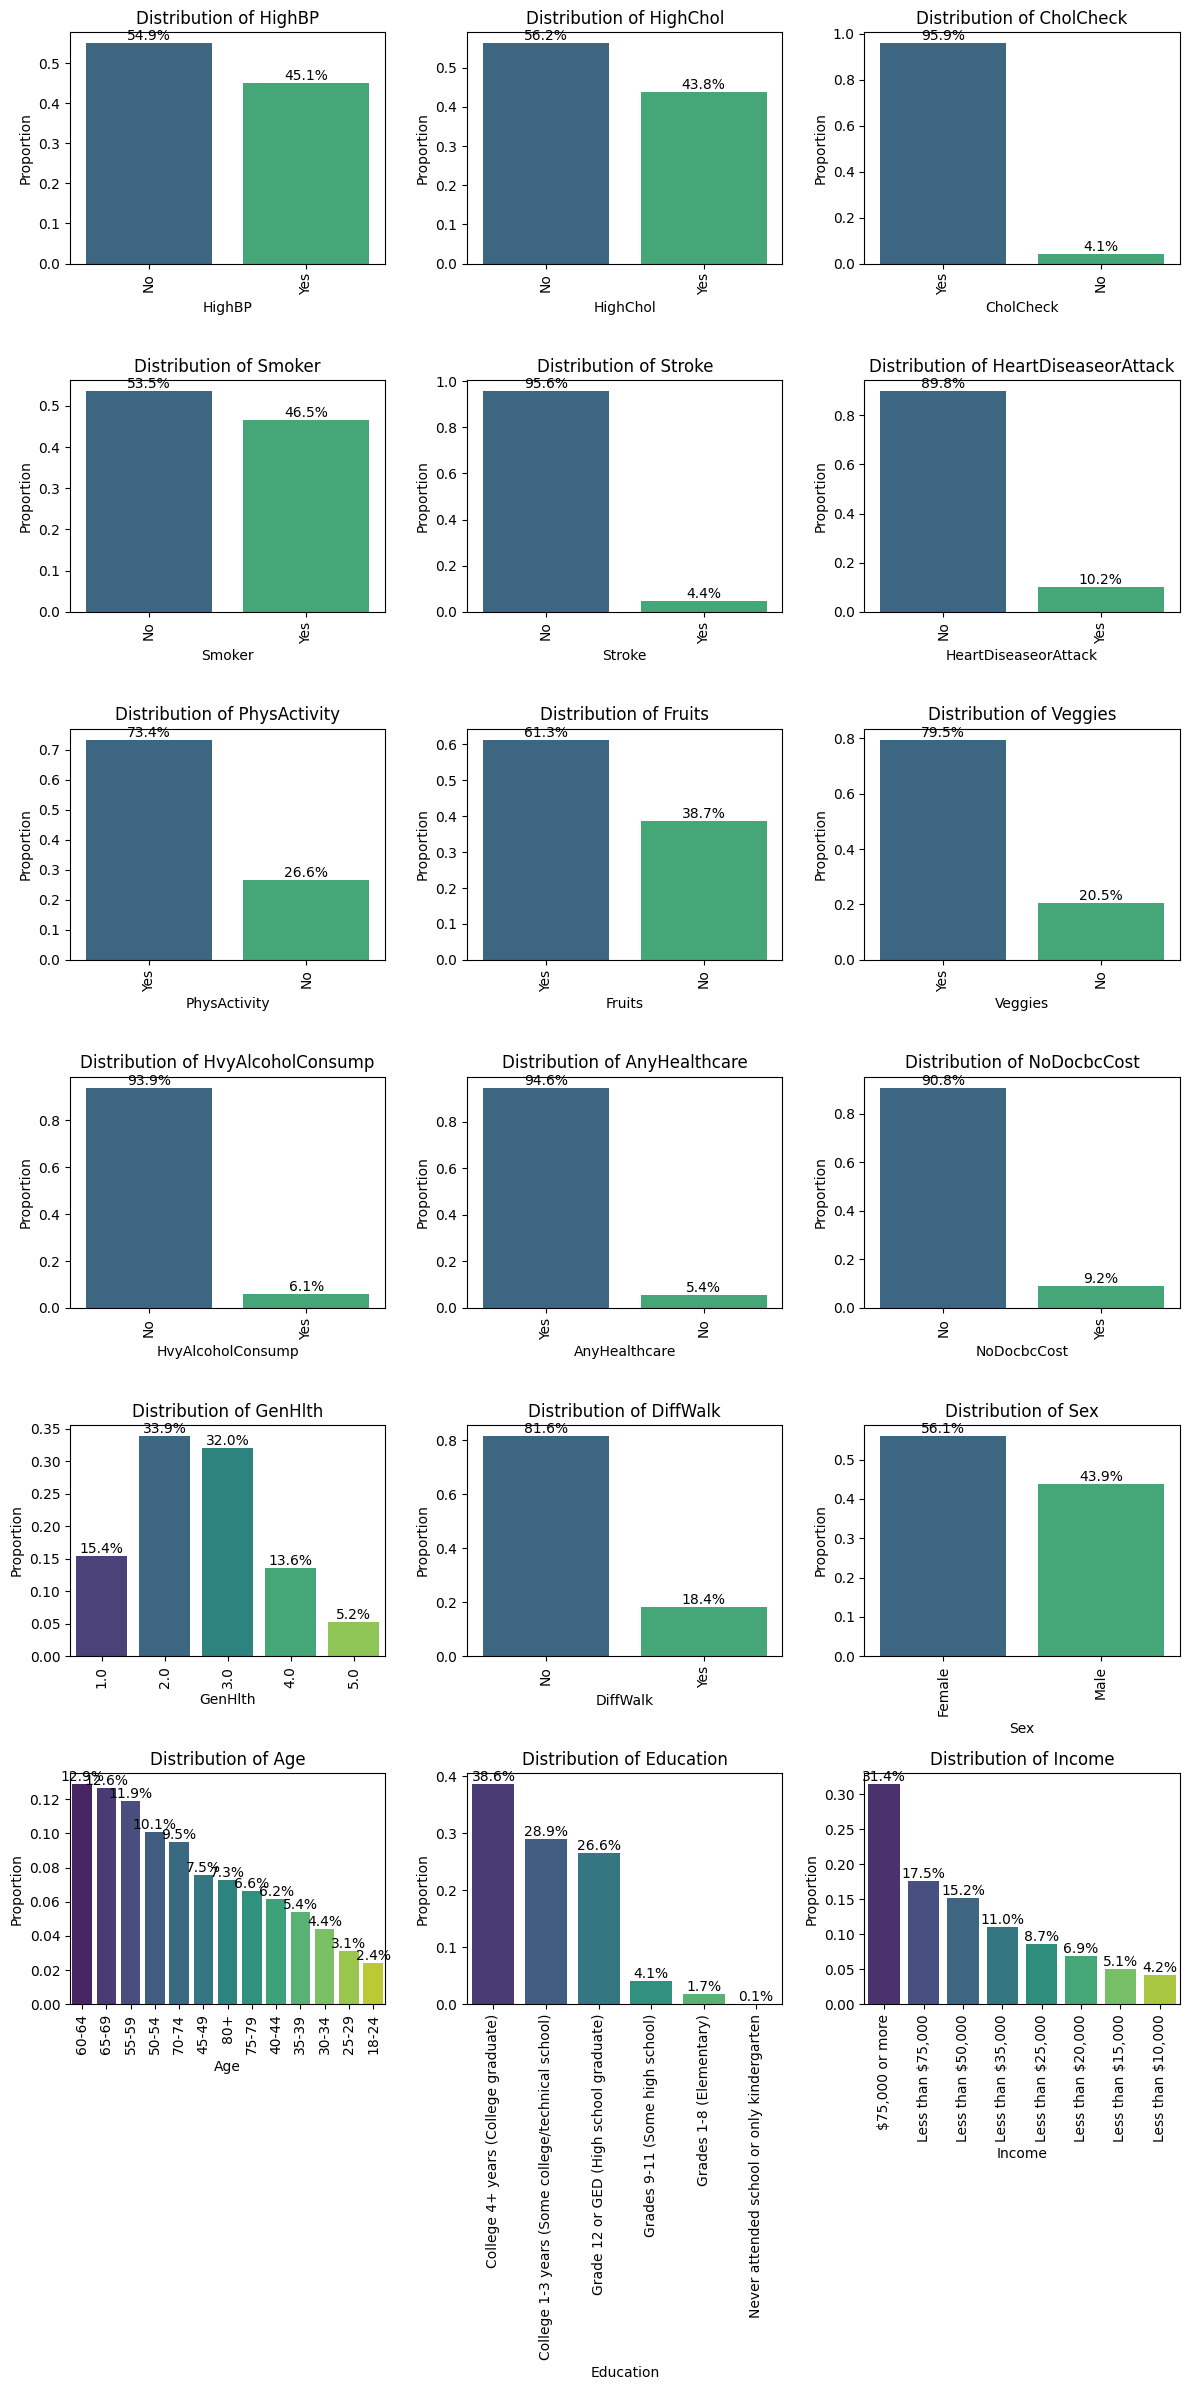

In [ ]:
# Determine the number of rows and columns for the subplots
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(categorical_columns):
    ax = axes[i]
    # Calculate proportions
    proportion = df[col].value_counts(normalize=True).reset_index()
    proportion.columns = [col, 'proportion']

    # Create the barplot
    sns.barplot(x=col, y='proportion', data=proportion, ax=ax, palette='viridis')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Proportion')
    ax.tick_params(axis='x', rotation=90)

    # Add percentage labels on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', labels=[f'{p*100:.1f}%' for p in container.datavalues])


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The bar plots visualize the distribution of each categorical variable, showing the proportion of observations in each category:

- **Binary Variables (Yes/No)**: Many features such as ``'HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', and 'NoDocbcCost'`` are binary. The plots show that most of these features have significant **class imbalance**, with one category ('No' for many health conditions, 'Yes' for CholCheck, PhysActivity, Fruits, Veggies, AnyHealthcare) being much more prevalent than the other. This is consistent with the initial observations from the descriptive statistics.
- **'GenHlth':** This categorical variable on a 1-5 scale shows a distribution where categories 2 and 3 (Good and Fair health) are the most frequent, followed by 4 and 1, with 5 (Poor health) being the least frequent.
- **'Age', 'Education', 'Income':** These ordinal categorical variables have multiple categories. 'Age' is somewhat spread across the middle to older age groups, with ``'60-64'`` being the most frequent. 'Education' shows that ``'College 4+ years'`` is the most common level. 'Income' is more spread out across the different income brackets, with ``'$75,000 or more'`` being the most frequent.

The observed class imbalances in many of these categorical features, particularly the binary ones, will be important to consider during model training, in addition to the imbalance in the target variable.

In [ ]:
print("Chi-Square Test Results between Categorical Columns and Target Variable:")

for col in categorical_columns:
    crosstab = pd.crosstab(df[col], df[target])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"\nColumn: {col}")
    print(f"  Chi-Sqaure Statistic: {chi2:.4f}")
    print(f"  P-Value: {p:.4f}")

    alpha = 0.05 # significant threshold
    if p < alpha:
        print("  --> There is a statistically significant relationship (Null hypothesis rejected).")
    else:
        print("  --> There is no statistically significant relationship (Null hypothesis could not be rejected).")

Chi-Square Test Results between Categorical Columns and Target Variable:

Column: HighBP
  Chi-Sqaure Statistic: 15263.5420
  P-Value: 0.0000
  --> There is a statistically significant relationship (Null hypothesis rejected).

Column: HighChol
  Chi-Sqaure Statistic: 9041.5543
  P-Value: 0.0000
  --> There is a statistically significant relationship (Null hypothesis rejected).

Column: CholCheck
  Chi-Sqaure Statistic: 1231.9205
  P-Value: 0.0000
  --> There is a statistically significant relationship (Null hypothesis rejected).

Column: Smoker
  Chi-Sqaure Statistic: 489.1558
  P-Value: 0.0000
  --> There is a statistically significant relationship (Null hypothesis rejected).

Column: Stroke
  Chi-Sqaure Statistic: 2309.7479
  P-Value: 0.0000
  --> There is a statistically significant relationship (Null hypothesis rejected).

Column: HeartDiseaseorAttack
  Chi-Sqaure Statistic: 6671.2418
  P-Value: 0.0000
  --> There is a statistically significant relationship (Null hypothesis rejecte

Based on the provided Chi-Square test results for all categorical columns against the ``'Diabetes'`` column:

The Chi-Square test for independence was conducted for each categorical variable to assess its relationship with the 'Diabetes' status. For every categorical column tested the p-value obtained was **0.0000**.

Since all calculated p-values are significantly less than the conventional ``significance level of 0.05``, we reject the null hypothesis for each test. This means that there is a **statistically significant relationship** between each of these categorical variables and the 'Diabetes' status.

While all tested categorical variables demonstrate a statistically significant relationship with diabetes status, some variables exhibit a **weaker association** compared to others, as indicated by relatively lower Chi-Square statistics. Specifically, variables such as ``Smoker, Fruits, Veggies, AnyHealthcare, NoDocbcCost, and Sex`` show a less pronounced relationship with the 'Diabetes' column when compared to variables with higher Chi-Square statistics like HighBP, GenHlth, and DiffWalk.

In conclusion, the analysis indicates that all the categorical features examined are not independent of an individual's diabetes status. This suggests that these variables are likely important factors associated with diabetes and will be valuable features for building a predictive model. The strength of the association varies between variables, as indicated by the different Chi-Square statistic values, but all show a statistically significant relationship with diabetes.

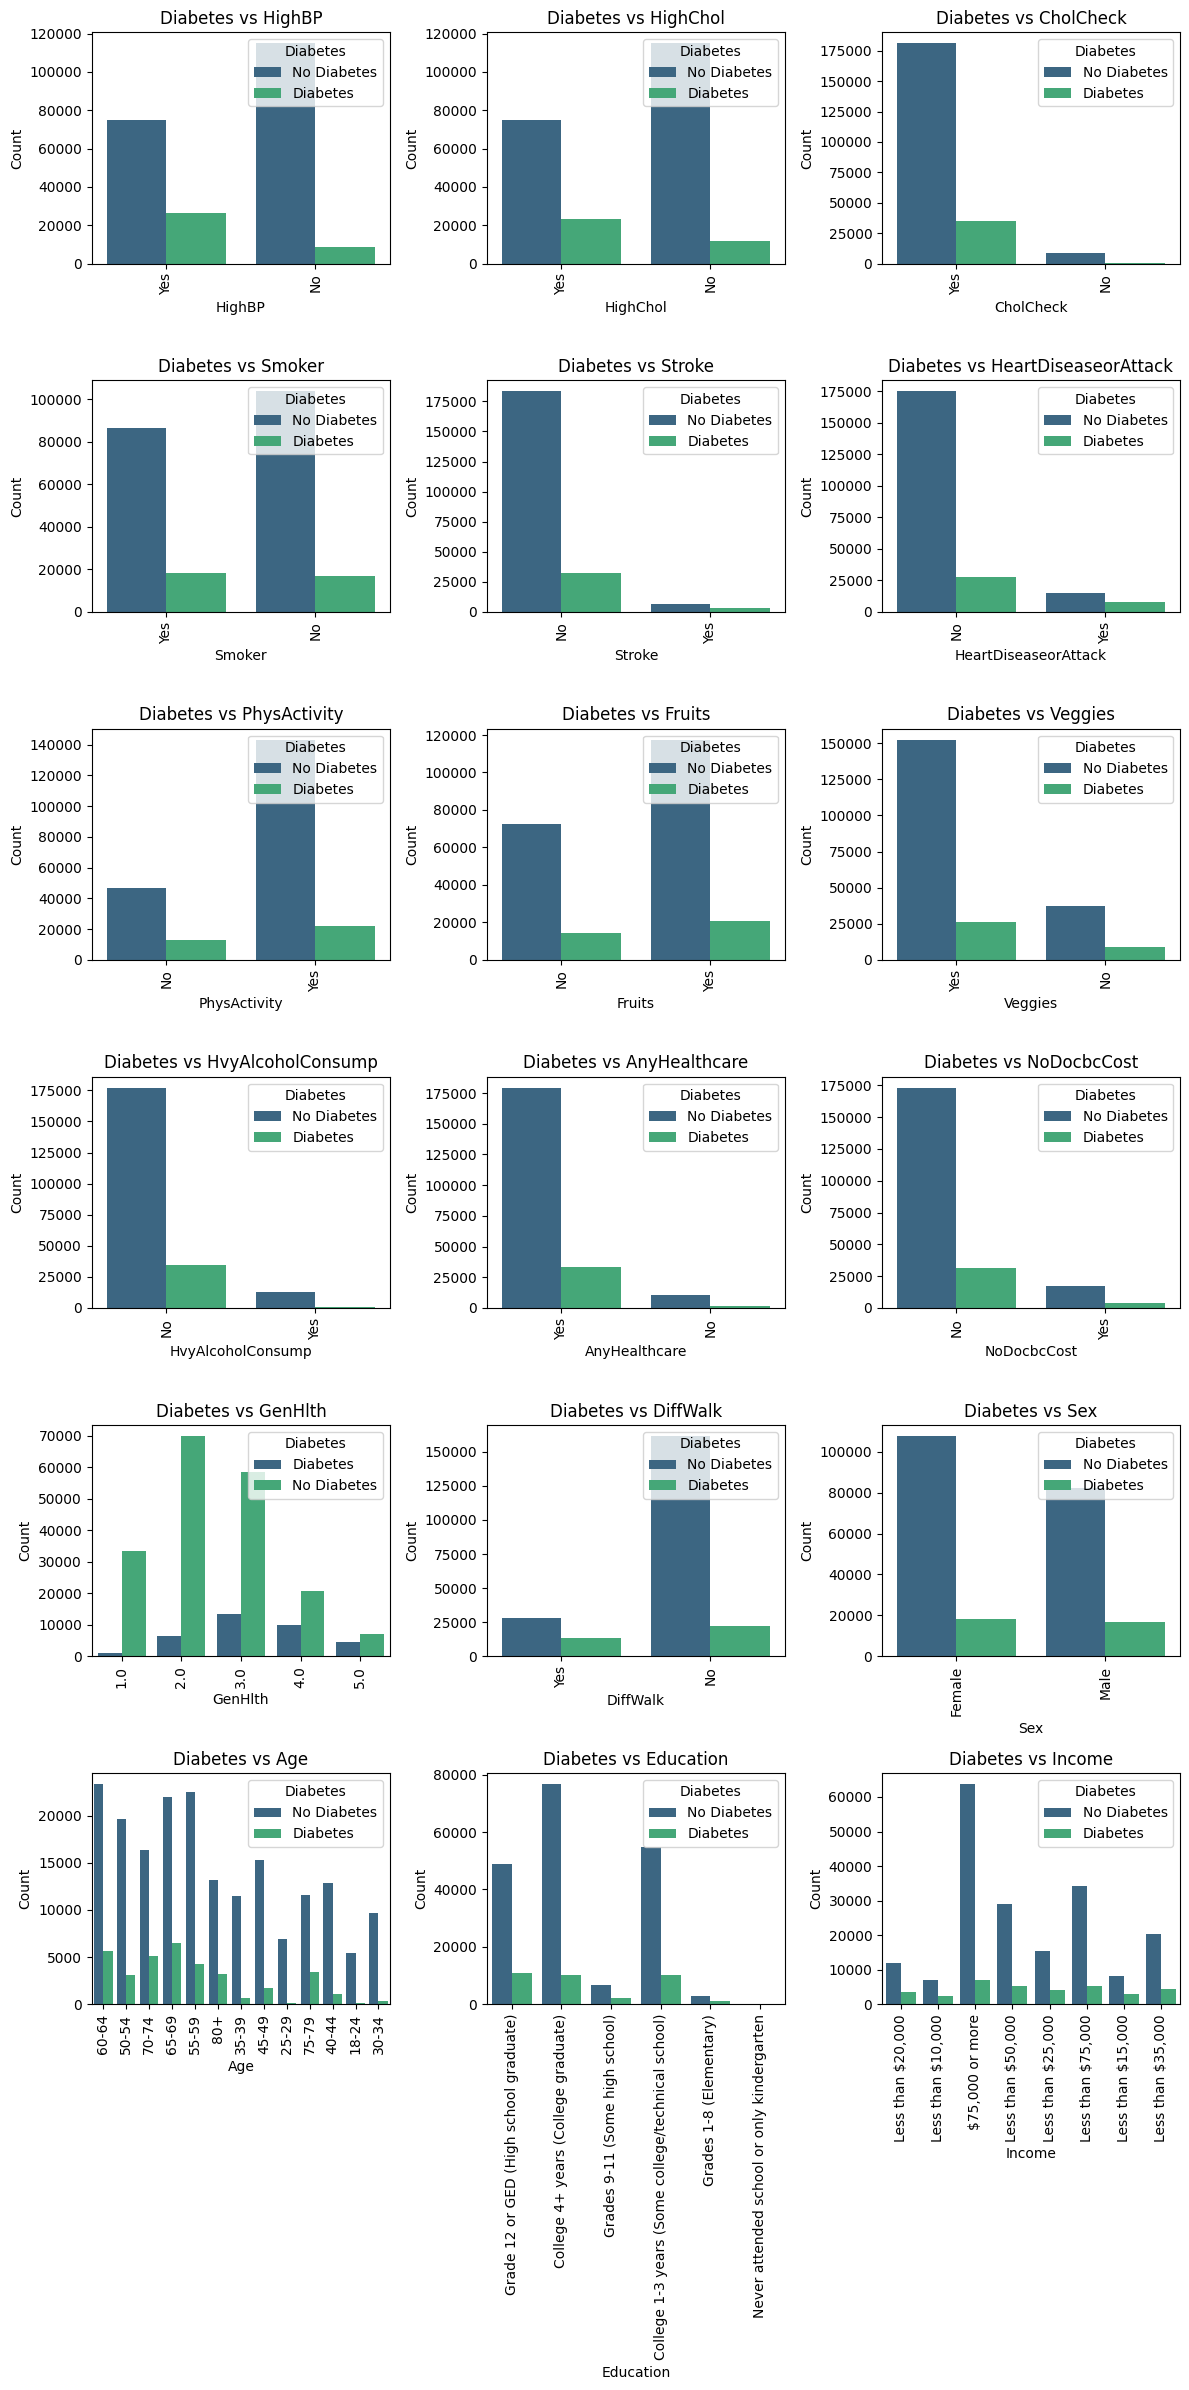

In [ ]:
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))

axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(x=col, hue=target, data=df, palette='viridis', ax=ax)
    ax.set_title(f'{target} vs {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=90)
    ax.legend(title=target, loc='upper right')


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

These count plots provide a visual breakdown of how the two diabetes statuses are distributed within each category of the categorical variables.

Looking at the bars for each categorical feature, we can observe:

- **Variables with clear visual distinctions:** For features like ``HighBP, HighChol, CholCheck, PhysActivity, Fruits, Veggies and AnyHealthcare`` the bars show that when the category is 'Yes', the counts for 'Diabetes' are **visibly higher** compared to when the category is 'No'. This indicates that a larger number of individuals with these conditions or difficulties fall into the diabetes group.

- **Variables showing a gradient or shift:** In features like ``GenHlth, Age, Education, and Income`` we can see a change in the relative heights of the bars across the categories. For instance, for 'GenHlth', the count of individuals with 'Diabetes' visibly increases from category 1 to 3, then decreases for categories 4 and 5. For 'Age', older age groups show higher counts in the 'Diabetes' bars. For 'Education' and 'Income', while there are variations, a clear trend of higher diabetes rates in lower education and income levels is not consistently observed across all categories compared to others.

- **Variables with less pronounced visual differences:** For features such as ``Smoker, Stroke, HeartDiseaseorAttack, HvyAlcoholConsump, DiffWalk, NoDocbcCost and Sex``, the visual differences in the counts of 'Diabetes' between categories might be less striking compared to the first group.

Overall, these plots reinforce the Chi-Square test results, visually demonstrating the relationship between each categorical feature and diabetes status, and highlighting which categories within each feature are more associated with diabetes.

---



## Feature Engineering

### 1. Feature Transformation

We will convert categorical features into their numerical representations so that they can be processed by machine learning models and included in analyses.

In [ ]:
# Diabetes
df['Diabetes'] = df['Diabetes'].replace({'No Diabetes':0, 'Diabetes':1})

# Sex
df['Sex'] = df['Sex'].replace({'Female':0, 'Male':1})

# Age
age_mapping = {"18-24":1, "25-29":2, "30-34":3, "35-39":4, "40-44":5, "45-49":6,
               "50-54":7, "55-59":8, "60-64":9, "65-69":10, "70-74":11, "75-79":12, "80+":13}

df['Age'] = df['Age'].map(age_mapping)

# Education
education_mapping = {"Never attended school or only kindergarten":1,
                     "Grades 1-8 (Elementary)":2,
                     "Grades 9-11 (Some high school)":3,
                     "Grade 12 or GED (High school graduate)":4,
                     "College 1-3 years (Some college/technical school)":5,
                     "College 4+ years (College graduate)":6}

df['Education'] = df['Education'].map(education_mapping)

# Income
income_mapping = {"Less than $10,000":1,
                  "Less than $15,000":2,
                  "Less than $20,000":3,
                  "Less than $25,000":4,
                  "Less than $35,000":5,
                  "Less than $50,000":6,
                  "Less than $75,000":7,
                  "$75,000 or more":8}

df['Income'] = df['Income'].map(income_mapping)

# Binary columns
binary_columns = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
                  'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
                  'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
                  'NoDocbcCost', 'DiffWalk']

df[binary_columns] = df[binary_columns].replace({"No":0, "Yes":1})

df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,1,1,1,40.0,1,0,0,0,0,1,...,0,5.0,18.0,15.0,1,0,9,4,3,0
1,0,0,0,25.0,1,0,0,1,0,0,...,1,3.0,0.0,0.0,0,0,7,6,1,0
2,1,1,1,28.0,0,0,0,0,1,0,...,1,5.0,30.0,30.0,1,0,9,4,8,0
3,1,0,1,27.0,0,0,0,1,1,1,...,0,2.0,0.0,0.0,0,0,11,3,6,0
4,1,1,1,24.0,0,0,0,1,1,1,...,0,2.0,3.0,0.0,0,0,11,5,4,0


### 2. Feature Importance

To improve our model's performance and provide better interpretability, we will conduct feature importance analysis to determine the relative importance of different features on the target variable. This analysis will help us understand the features that are most influential in model training and potentially allow us to remove less important features to reduce model complexity.

In [ ]:
X = df.drop("Diabetes",axis=1)
y = df["Diabetes"]

X_ftrain,X_ftest,y_ftrain,y_ftest = train_test_split(X,y,test_size=0.25,random_state=42)

X_ftrain.shape, X_ftest.shape, y_ftrain.shape, y_ftest.shape

((168864, 21), (56288, 21), (168864,), (56288,))

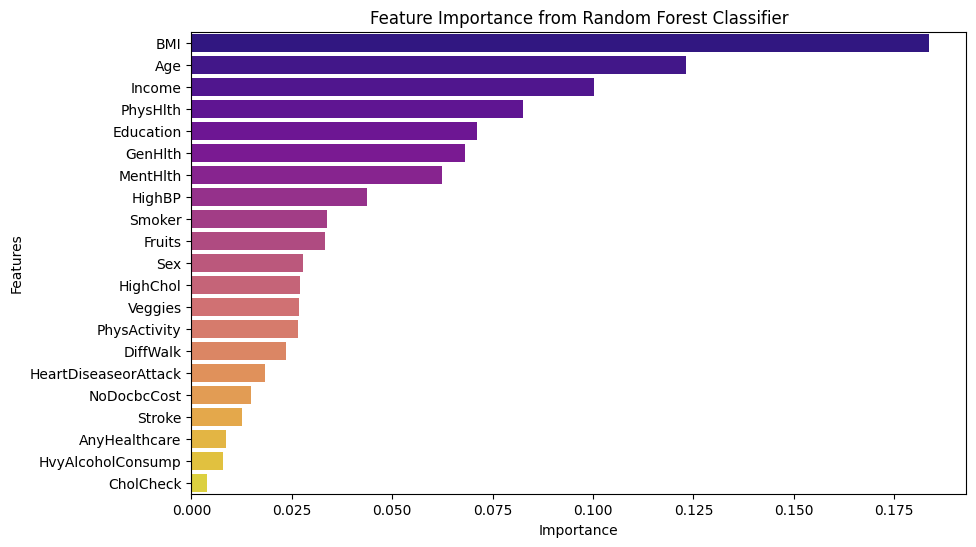

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_ftrain,y_ftrain)

importances_rf = rf_model.feature_importances_
features_rf = X_ftrain.columns

importance_rf = pd.DataFrame({
    "Features":features_rf,
    "Importance":importances_rf
}).sort_values(by="Importance",ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x="Importance",y="Features",data=importance_rf,palette="plasma")
plt.title("Feature Importance from Random Forest Classifier")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

The feature importance graph obtained from the Random Forest model provides a ranking of the most effective features for diabetes prediction:

- **Most Important Features:** According to the graph, the features with the highest importance levels are ``'BMI', 'Age,' 'Income,' 'PhysHlth', 'Education', 'GenHlth' and 'MentHlth'.`` This finding demonstrates that these variables play a significant role in predicting an individual's diabetes status.
- **Less Important Features:** Features such as `'HighBP'`, `'Smoker'`, `'Fruits'`, `'Sex'`, `'HighChol'`, `'Veggies'`, and `'PhysActivity'` are of medium importance, while `'DiffWalk'`, `'HeartDiseaseorAttack'`, `'NoDocbcCost'`, `'Stroke'`, `'AnyHealthcare'`, `'HvyAlcoholConsump'`, and `'CholCheck'` are of lowest importance.

This analysis helps us understand which features the Random Forest model prioritizes and provides a valuable starting point for potential feature selection decisions.

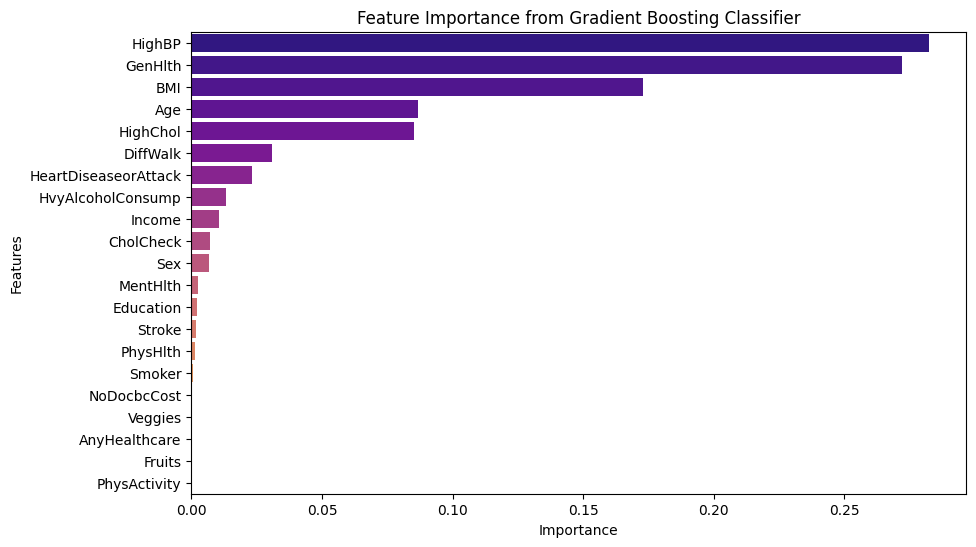

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_ftrain, y_ftrain)

importances_gb = gb_model.feature_importances_
features_gb = X_ftrain.columns

importance_gb = pd.DataFrame({
    "Features":features_gb,
    "Importance":importances_gb
}).sort_values(by="Importance",ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x="Importance",y="Features",data=importance_gb,palette="plasma")
plt.title("Feature Importance from Gradient Boosting Classifier")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

The feature importance graph obtained from the Gradient Boosting model ranks the importance of features for diabetes prediction, similar to the Random Forest model, but with some differences:

- **Most Important Features:** According to the Gradient Boosting model, ``'HighBP', 'GenHlth', and 'BMI'`` are the most important features. ``'Age' and 'HighChol'`` also make significant contributions. This confirms that these features are strong predictors for diabetes prediction.
- **Less Important Features:** `'DiffWalk'`, `'HeartDiseaseorAttack'`, and `'HvyAlcoholConsumption'` are of moderate importance, while the remaining features (`'Income'`, `'CholCheck'`, `'Sex'`, `'MentHlth'`, `'Education'`, `'Stroke'`, `'PhysHlth'`, `'Smoker'`, `'NoDocbcCost'`, `'Veggies'`, `'AnyHealthcare'`, `'Fruits'`, `'PhysActivity'`) are of lower importance. In particular, `'PhysActivity'` is of almost zero importance in this model.

There are some consistencies (e.g., higher importance of BMI, GenHlth, and Age) and some differences (e.g., higher importance of HighBP in Gradient Boosting) between the feature importance rankings of both models. These analyses demonstrate that different model types can focus on different features on the same data and provide valuable insights for feature selection decisions.

**Summary of Feature Importance Analyses and Feature Selection Decision**
Based on previous EDA findings and Random Forest and Gradient Boosting feature importance analyses, we will remove some features from the dataset to improve model performance and reduce complexity.

**Key Findings:**

- **High Importance Features:** ``'HighBP', 'GenHlth', 'BMI', and 'Age'`` consistently showed high importance in both models.

- **Low Importance Features:** ``'PhysActivity', 'Fruits', 'Veggies', 'AnyHealthcare', 'NoDocbcCost', 'CholCheck', 'Sex', 'Stroke' and 'Smoker'`` were found to have low importance in both models.

**Features to Remove:**

We will remove the following features due to their low importance and weaker association with diabetes:

``'PhysActivity', 'Fruits', 'Veggies', 'AnyHealthcare', 'NoDocbcCost', 'CholCheck', 'Sex', 'Stroke' and 'Smoker'``

This step aims to reduce complexity and noise by allowing the model to focus on more important features. It is important to carefully evaluate model performance after feature removal.



---



## Pre-Processing

### Train - Test - Validation Split

In [ ]:
# Separate features and labels
X = df.drop(['Diabetes', 'PhysActivity', 'Veggies', 'Fruits', 'AnyHealthcare', 'NoDocbcCost', 'CholCheck', 'Sex', 'Stroke', 'Smoker'], axis=1)
y = df['Diabetes']

# Split the data into training (80%) and testing (20%)
X_val_train, X_test, y_val_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split the training data into training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_val_train, y_val_train, test_size=0.2, random_state=42, stratify=y_val_train)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}\n")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}\n")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (144096, 12)
Shape of y_train: (144096,)

Shape of X_val: (36025, 12)
Shape of y_val: (36025,)

Shape of X_test: (45031, 12)
Shape of y_test: (45031,)


### Calculating SMOTEENN for Imbalanced Data

In [ ]:
from imblearn.combine import SMOTEENN

# Apply SMOTE-ENN to the training data only
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

print("Shape of original training data:", X_train.shape)
print("Shape of resampled training data:", X_train_resampled.shape)

# Check the distribution of the target variable in the resampled training data
print("\nDistribution of Diabetes in resampled training data after SMOTE-ENN:")
print(y_train_resampled.value_counts())

Shape of original training data: (144096, 12)
Shape of resampled training data: (174327, 12)

Distribution of Diabetes in resampled training data after SMOTE-ENN:
Diabetes
1    101184
0     73143
Name: count, dtype: int64


### Scaling Continuous Variables (RobustScaler)

In [ ]:
# Apply RobustScaler to continuous columns
scaler = RobustScaler()

# Fit the scaler on the training data and transform
X_train_resampled[continuous_columns] = scaler.fit_transform(X_train_resampled[continuous_columns])

# Transform the validation and test data using the fitted scaler
X_val[continuous_columns] = scaler.transform(X_val[continuous_columns])
X_test[continuous_columns] = scaler.transform(X_test[continuous_columns])

display(X_train_resampled.head())

,HighBP,HighChol,BMI,HeartDiseaseorAttack,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0,0,-0.558918,0,0,3.0,0.000000,0.000000,1,13,6,8
1,0,0,-1.117837,0,1,1.0,1.333333,0.142857,0,2,6,6
2,0,0,-0.670702,0,0,2.0,1.000000,0.000000,0,3,6,8
3,1,1,-0.782486,1,0,4.0,10.000000,4.285714,1,9,4,6
4,0,0,-0.782486,0,0,4.0,0.000000,0.000000,0,12,3,5


### Converting Data to PyTorch Tensors

In [ ]:
# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float)

X_val_tensor = torch.tensor(X_val.values, dtype=torch.float)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float)

print("Shapes of the created tensors:")
print(f"X_train_tensor: {X_train_tensor.shape}")
print(f"y_train_tensor: {y_train_tensor.shape}\n")
print(f"X_val_tensor: {X_val_tensor.shape}")
print(f"y_val_tensor: {y_val_tensor.shape}\n")
print(f"X_test_tensor: {X_test_tensor.shape}")
print(f"y_test_tensor: {y_test_tensor.shape}")

Shapes of the created tensors:
X_train_tensor: torch.Size([144096, 12])
y_train_tensor: torch.Size([144096])

X_val_tensor: torch.Size([36025, 12])
y_val_tensor: torch.Size([36025])

X_test_tensor: torch.Size([45031, 12])
y_test_tensor: torch.Size([45031])




---



## Modelling

### Baseline Model: Logistic Regression

Before developing more complex models, it's important to establish a baseline for our model performance. Logistic Regression is a common and simple model for binary classification tasks. We'll use ``Logistic Regression`` as a **baseline model** to capture the underlying linear relationships in our dataset and provide a starting point for evaluating the performance of more advanced models, such as the neural network we'll train later.

In [ ]:
logistic_model = LogisticRegression(random_state=42)

# Train the model on the training data
logistic_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

In [ ]:
print("Logistic Regression Model Performance on Test Set:")
print(classification_report(y_test, y_pred))

Logistic Regression Model Performance on Test Set:
              precision    recall  f1-score   support

           0       0.95      0.62      0.75     38012
           1       0.28      0.83      0.42      7019

    accuracy                           0.65     45031
   macro avg       0.62      0.72      0.59     45031
weighted avg       0.85      0.65      0.70     45031



Examining the performance of the Logistic Regression model on the test set:

* **Overall Accuracy (65%)** is not a sufficient metric on its own due to class imbalance.
* For **Class 0 (No Diabetes)**, the model performs quite well (Precision 0.95, F1-Score 0.75, Recall 0.62). It correctly predicts most of the true "No Diabetes" cases.
* For **Class 1 (Diabetes)**, the model's performance is poor. Although Recall is high (0.83%), Precision is very low (0.28%). This indicates that the model is good at capturing diabetes cases (high Recall), but is incorrectly labeling many people without diabetes as having diabetes (low Precision and high False Positives). The F1-Score (0.42) reflects this imbalance.

**Conclusion:** While the model predicts the majority class well, it produces a significant number of false positives for the minority class ("Diabetes"). This situation persists despite the implementation of SMOTE-ENN. Further improvements (different models, hyperparameter optimization, etc.) may be required to increase the model's precision for the "Diabetes" class and reduce the false positive rate.



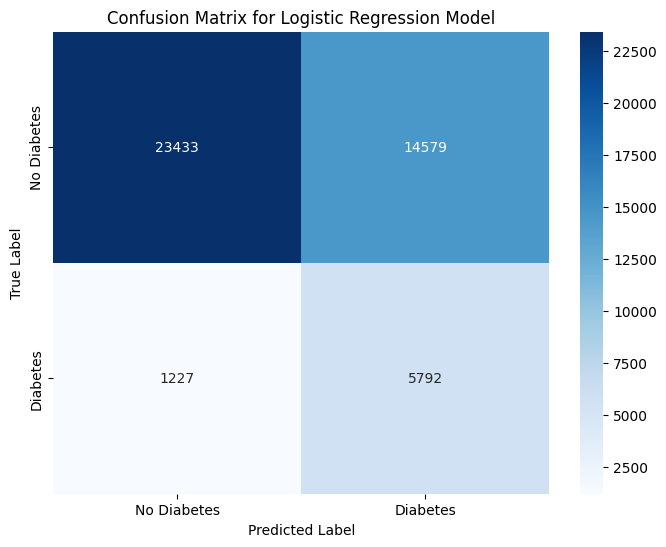

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['No Diabetes', 'Diabetes']

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The confusion matrix performance of the Logistic Regression model can be summarized as follows:

- **True Negatives (TN - 23433):** The model correctly predicted many people with "No Diabetes."
- **False Positives (FP - 14579):** However, a significant portion of those predicted as "Diabetes" were actually "No Diabetes" (too many false alarms).
- **False Negatives (FN - 1227):** The number of true diabetes cases missed by the model was relatively low.
- **True Positives (TP - 5792):** The model correctly predicted a significant portion of people with diabetes.

**Conclusion:** While the model identifies those without diabetes well, it produces too many false positives in predicting diabetes. This results in low Precision and suggests that the model is prone to false alarms.



In [ ]:
y_prob = logistic_model.predict_proba(X_test)[:, 1] # Select probabilities for the positive class
roc_auc_ovr = roc_auc_score(y_test, y_prob) # Calculate roc-auc score
print(f"ROC AUC: {roc_auc_ovr:.4f}")

ROC AUC: 0.7998


**ROC AUC** is a measure of how well a classification model can distinguish classes at different thresholds (1 is perfect, 0.5 is random). In binary classification, this is the ability to distinguish a positive class (Diabetes) from a negative class (No Diabetes).

A score of 0.7998 indicates that the model can distinguish classes better than random guessing. However, not being close enough to 1 indicates that the model cannot perfectly distinguish classes. This score reflects the difficulty in distinguishing minority classes in particular and suggests potential for improvement in the model's performance.

### Neural Network Architecture with Pytorch

Let's define a more complex model to better capture nonlinear relationships within the data, as opposed to a linear model like Logistic Regression. We'll create a neural network model using PyTorch's ``nn.Module``. The architecture will consist of multiple layers with activation functions to learn these nonlinear patterns.

In [ ]:
class DiabetesPredictor(nn.Module):
    def __init__(self, input_size):
        super(DiabetesPredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = F.relu(self.bn2(self.fc2(x)))
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.fc4(x)
        # For binary classification with BCEWithLogitsLoss, no activation is needed here.
        return x.squeeze(1) # Remove the extra dimension

input_size = X_train_tensor.shape[1]
# Instantiate the model
model = DiabetesPredictor(input_size)

print(model)

DiabetesPredictor(
  (fc1): Linear(in_features=12, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=64, out_features=1, bias=True)
)


Now, let's define the loss function, optimizer, and set up the data loaders for training and validation.

In [ ]:
# Define loss function with class weights
criterion = nn.BCEWithLogitsLoss()

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Create DataLoader for training and validation sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

print("Criterion, optimizer, and data loaders are set up.")

Criterion, optimizer, and data loaders are set up.


Now, we can train the neural network model. We will monitor the training and validation loss to evaluate the model's learning progress. Additionally, we will implement **early stopping**: if the validation loss does not improve for 25 consecutive epochs, training will be stopped, and the best model weights will be loaded.

In [ ]:
# Training loop
num_epochs = 100
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Early Stopping parameters
best_val_loss = float('inf')
patience = 25
epochs_no_improve = 0

# Path to save the best model
best_model_path = '/content/drive/MyDrive/Colab Notebooks/Pytorch Capstone Projects/best_model.pth'

for epoch in range(num_epochs):
    model.train() # Set the model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step() # Optimize
        running_loss += loss.item() * inputs.size(0)

        predicted = (torch.sigmoid(outputs) > 0.5).float()
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()


    epoch_train_loss = running_loss / len(train_dataset)
    epoch_train_accuracy = 100 * correct_train / total_train
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_accuracy)

    # Validation loop
    model.eval() # Set the model to evaluation mode
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item() * inputs.size(0)

            predicted = (torch.sigmoid(outputs) > 0.5).float()
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()


    epoch_val_loss = running_val_loss / len(val_dataset)
    epoch_val_accuracy = 100 * correct_val / total_val
    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_accuracy)


    print(f"Epoch {epoch+1}/{num_epochs} - accuracy: {epoch_train_accuracy:.4f} - loss: {epoch_train_loss:.4f} - val_accuracy: {epoch_val_accuracy:.4f} - val_loss: {epoch_val_loss:.4f}")

    # Early stopping logic
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        epochs_no_improve = 0
        # Save the best model
        torch.save(model.state_dict(), best_model_path)
    else:
        epochs_no_improve += 1
        if epochs_no_improve == patience:
            print(f"Early stopping triggered after {patience} epochs without improvement.")
            # Load the best model before stopping
            model.load_state_dict(torch.load(best_model_path))
            print("Loaded best model weights.")
            break # Stop training

Epoch 1/100 - accuracy: 85.2390 - loss: 0.3381 - val_accuracy: 84.4108 - val_loss: 0.5970
Epoch 2/100 - accuracy: 85.2453 - loss: 0.3373 - val_accuracy: 84.4108 - val_loss: 0.6796
Epoch 3/100 - accuracy: 85.2744 - loss: 0.3375 - val_accuracy: 84.4108 - val_loss: 0.7480
Epoch 4/100 - accuracy: 85.2820 - loss: 0.3370 - val_accuracy: 84.4108 - val_loss: 0.5831
Epoch 5/100 - accuracy: 85.2897 - loss: 0.3373 - val_accuracy: 84.4108 - val_loss: 0.7100
Epoch 6/100 - accuracy: 85.2577 - loss: 0.3371 - val_accuracy: 84.4108 - val_loss: 0.5863
Epoch 7/100 - accuracy: 85.3230 - loss: 0.3369 - val_accuracy: 84.4108 - val_loss: 0.5292
Epoch 8/100 - accuracy: 85.2661 - loss: 0.3368 - val_accuracy: 84.4108 - val_loss: 0.5816
Epoch 9/100 - accuracy: 85.2841 - loss: 0.3365 - val_accuracy: 84.4108 - val_loss: 0.6840
Epoch 10/100 - accuracy: 85.3327 - loss: 0.3362 - val_accuracy: 84.4108 - val_loss: 0.5722
Epoch 11/100 - accuracy: 85.3167 - loss: 0.3358 - val_accuracy: 84.4108 - val_loss: 0.5366
Epoch 12

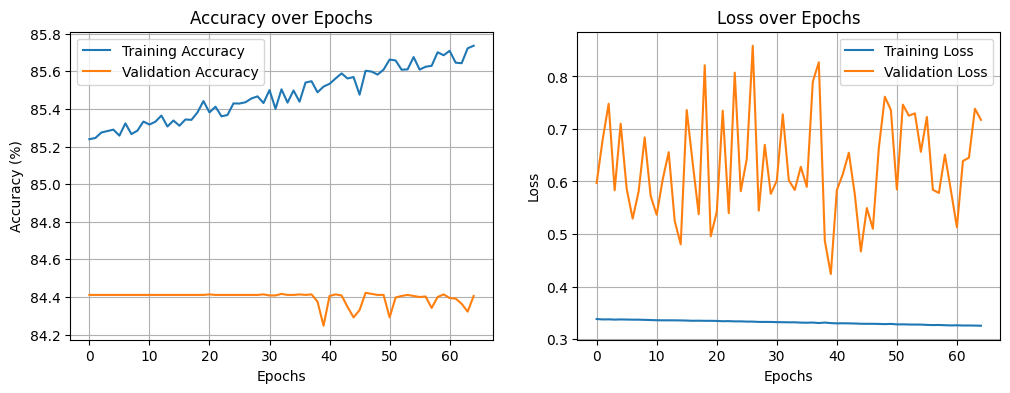

In [ ]:
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.show()

plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

Looking at the training and validation accuracy and loss graphs:

**Accuracy Graph:**

- **Training Accuracy:** Training accuracy gradually increases as the epochs progress. This indicates that the model is gradually improving its fit to the training data.
- **Validation Accuracy:** Validation accuracy remained approximately constant (around 84.41%) throughout the training period.. This indicates that while the model is learning from the training data, its ability to generalize to new, unseen data in the validation set remains at a certain level. This plateau in validation accuracy suggests that the model is no longer able to improve at classifying examples in the validation set at this point, or that overfitting has begun.

**Loss Graph:**

- **Training Loss:** The training loss decreases steadily across epochs. This confirms that the model successfully reduces errors in the training data.
- **Validation Loss:** The validation loss has fluctuated without any significant improvement.. Early stopping stopped training at the point where the validation loss showed no improvement over 25 consecutive epochs. A higher validation loss than the training loss and a subsequent decrease is a sign that the model is overfitting the training data.

**Overall Assessment:**

The graphs show that the model successfully learned the training data (decreasing training loss, increasing training accuracy), but its performance plateaued on the validation set. The early stopping mechanism was effective in preventing the model from overtraining by stopping training when the validation loss stopped improving. The stability of validation accuracy suggests that the model may have reached the maximum performance level it could achieve on the validation set with this architecture and current hyperparameters.



---



## Evaluating Model on the Test Set

One of the main goals of this project is to identify potential diabetic patients as accurately as possible. In healthcare classification tasks, especially in the early diagnosis of serious conditions like diabetes, **Recall** is generally more critical than **Precision**.

This is because:

* Misclassifying a diabetic individual as "not diabetic" (False Negative - low Recall) can lead to delays in treatment and intervention, potentially leading to serious health consequences. This type of error is generally more costly and risky.

* Misclassifying a non-diabetic individual as "diabetic" (False Positive - low Precision) may require additional testing or evaluation. This may incur additional costs and inconvenience, but it is not as critical as missing a potentially life-saving diagnosis and can usually be corrected with further testing.

In this context, to prioritize the model's ability to capture all cases of diabetes (Recall), we will choose a classification threshold of **0.1** for the final evaluation on the test set. This threshold allows us to achieve higher Recall values, assuming that the decrease in Precision is acceptable due to the nature of the healthcare application.

In [ ]:
# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    predicted_prob = torch.sigmoid(outputs)
    predicted = (predicted_prob > 0.05).float()


# Convert tensors to numpy arrays for evaluation
y_test_np = y_test_tensor.numpy()
predicted_np = predicted.numpy()
predicted_prob_np = predicted_prob.numpy()

In [ ]:
# Print classification report
print("Neural Network Model Performance on Test Set:")
print(classification_report(y_test_np, predicted_np))

Neural Network Model Performance on Test Set:
              precision    recall  f1-score   support

         0.0       0.94      0.58      0.72     38012
         1.0       0.26      0.79      0.39      7019

    accuracy                           0.62     45031
   macro avg       0.60      0.69      0.55     45031
weighted avg       0.83      0.62      0.67     45031



Neural Network Model Performance on the Test Set with a 0.05 Threshold:

* **Overall Accuracy (62%)** is not a complete indicator due to class imbalance.
* **Class 0 (No Diabetes):** It predicts well with high Precision (0.94), but slightly lower Recall (0.58) as the threshold is lowered.
* **Class 1 (Diabetes):** It captures diabetes cases well with **high Recall (0.79%)**, but produces a high number of false positives due to **low Precision (0.26%)**. The F1-Score (0.39) reflects this imbalance.

**Conclusion:** The 0.05 threshold was successful in increasing Recall, which is our priority in the healthcare field. While the model performs well in missing potential diabetes cases, additional work may be required to reduce the false positive rate.

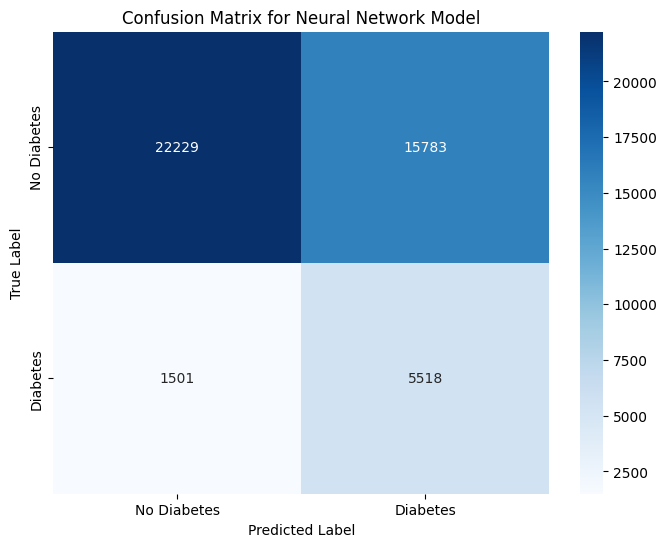

In [ ]:
# Generate and plot the confusion matrix
cm_nn = confusion_matrix(y_test_np, predicted_np)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for Neural Network Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The confusion matrix performance of the Neural Network model on the test set with a threshold of 0.05 can be summarized as follows:

- **True Negatives (TN - 22229):** The model correctly predicted many people with "No Diabetes."
- **False Positives (FP - 15783):** However, a very large portion of those predicted as "Diabetes" were actually "No Diabetes" (a very high number of false alarms).
- **False Negatives (FN - 1501):** The number of true diabetes cases missed by the model was relatively low (high recall).
- **True Positives (TP - 5518):** The model correctly predicted a significant portion of people with diabetes.

**Conclusion:** The model is successful at capturing true diabetes cases (low FN), but it produces a high number of false positives (high FP).



---



## Project Report Predicting Diabetes Using Health Factors

### Introduction and Purpose
This project aimed to develop a classification model to predict the presence of diabetes in individuals based on various health and lifestyle factors using a subset of the Behavioral Risk Factor Surveillance System (BRFSS) 2015 dataset. The primary goal of the project is to potentially assist healthcare professionals in identifying individuals at high risk of diabetes using factors readily available through telephone surveys. Initially, a ternary classification ``(No Diabetes, Prediabetes, Diabetes)`` was targeted, but due to the extremely small number of instances of the **'Prediabetes'** class in the dataset, the problem was modified to a binary classification ``(No Diabetes vs. Diabetes)``.

### Data Exploration and Preprocessing Summaries

The dataset initially contained 253,680 samples and 22 features.

- **Data Quality:** There were no missing values ​​in the dataset. However, 23,899 duplicate records were identified and removed to ensure data integrity, reducing the dataset to 229,781 samples.
- **Variable Types and Transformation:** Many features in the dataset are binary (Yes/No) or categorical. All categorical variables were converted to their numerical representations for model training.
- **Continuous Variables:** BMI, MentHlth, and PhysHlth are continuous variables. Positive skewness and outliers were observed in these variables. The RobustScaler scaling method was used to reduce the impact of outliers on the model.
- **Target Variable Imbalance:** Even after converting to a binary classification problem, there was a significant class imbalance in the target variable: 'No Diabetes' (84.4%) and 'Diabetes' (15.6%). To address this imbalance and enable the model to better learn the minority class, the ``SMOTE-ENN`` resampling technique was applied to the training dataset.
- **Feature Selection:** Following feature importance analysis using Random Forest and Gradient Boosting models, some features identified as low importance were removed from the dataset to reduce model complexity. The remaining 12 features were used for model training.
- **Data Splitting:** The dataset was stratified (preserving the class ratios) into training (64%), validation (16%), and test (20%) sets.

### Model Performance Evaluation
The performance of two different models on the test set was evaluated:

#### Baseline Model: Logistic Regression
The performance of the Logistic Regression model trained on the SMOTE-ENN applied training data on the test set (with a threshold of 0.5):

- **Accuracy:** 65%
- **Class 0 (No Diabetes):** Precision: 0.95, Recall: 0.62, F1-Score: 0.75
- **Class 1 (Diabetes):** Precision: 0.28, Recall: 0.83, F1-Score: 0.42
- **Confusion Matrix:** High True Negatives (23433) but a significant number of False Positives (14579). True Positives (5792) and relatively low False Negatives (1227).
- **ROC AUC:** 0.7998

**Comment:** While the baseline model predicted the majority class well, it showed high recall but low precision for the minority class ("Diabetes"), indicating that it produced a high number of false positives.

#### Neural Network Model
A neural network model with three hidden layers (256, 128, and 64 neurons) was trained using PyTorch to capture more complex patterns. Early stopping (patience 25) and model checkpointing were used. Model performance on the test set was evaluated using a **threshold of 0.05**, in line with healthcare priorities:

- **Accuracy:** 62%
- **Class 0 (No Diabetes):** Precision: 0.94, Recall: 0.58, F1-Score: 0.72
- **Class 1 (Diabetes):** Precision: 0.26, Recall: 0.79, F1-Score: 0.39
- **Confusion Matrix:** High True Negatives (22,229) but very high False Positives (15,783). Relatively low False Negatives (1,501) and reasonable True Positives (5,518).

**Comment:** The neural network model achieved high recall (79%) for Class 1 with a threshold of 0.05, a positive result for the goal of detecting diabetes cases. However, this high recall comes with low precision (26%), resulting in a high number of false positives. Compared to the Logistic Regression model, the neural network initially failed to predict Class 1 at all with a threshold of 0.5, but lowering the threshold to 0.05 significantly increased recall, but its precision remained low.

### The Most Important Metric and Why
In the context of this project, **Recall** is the most important metric for predicting a potentially serious condition like diabetes. Mistakenly classifying someone with diabetes as "not diabetic" (False Negative) can lead to delays in diagnosis and treatment, leading to serious health problems. Classifying someone without diabetes as "diabetic" (False Positive), while requiring additional testing, is generally less risky and a correctable error. Therefore, the model's ability to detect all potential cases of diabetes (high Recall) was prioritized.

### Surprising Results

One of the most surprising results was that the neural network model initially failed to correctly predict Class 1 (Diabetes) on the test set (with a threshold of 0.5), with all Class 1 metrics returning 0.00. Evaluations with different thresholds showed that the model assigned very low probabilities to the positive class. This was a clear indication of class imbalance and the model's difficulty distinguishing the minority class. While it was possible to increase recall by lowering the threshold, the low precision problem persisted.

### Data and Model Limitations

- **Dataset Limitations:** The dataset used (BRFSS 2015 subset) consists of telephone survey data from a specific year. It is unclear how well these data represent the entire US population or other geographic areas. Furthermore, individuals may not have participated in the telephone surveys or may have provided different information about their health status. These limitations may affect the generalizability of the model.
- **Feature Limitations:** Only certain health and lifestyle factors were used. Other factors that may be important for diagnosing diabetes (genetic predisposition, family history, detailed medical test results, etc.) were not included in the dataset.
- **Model Interpretability:** Complex models like neural networks are less interpretable than simpler models like Logistic Regression. It is more difficult to fully understand which features most influence the model's decisions.
- **Clinical Relevance:** The model is for research and learning purposes. It is not suitable for use as a true clinical decision support system and should not be used as the basis for medical diagnosis or treatment decisions.

### Actionable Next Steps and Recommendations

1. **Threshold Optimization:** Determine the threshold that best suits the project's priorities more systematically by plotting a curve (such as a Precision-Recall curve) showing the impact of different threshold values ​​on Precision and Recall.
2. **More Advanced Balancing Techniques:** Try different resampling techniques (e.g., SMOTE alone, ADASYN) or different balancing ratios instead of SMOTE-ENN. Also consider techniques such as adding class weights directly to the loss function.
3. **Model Architecture Optimization:** Improve the model architecture by experimenting with different layers, different neuron counts, different activation functions, or additional regularization techniques.
4. **Hyperparameter Optimization:** Perform a more comprehensive search for hyperparameters such as learning rate, optimizer selection, and batch size (e.g., Grid Search, Random Search, Bayesian Optimization).
5. **Trying Different Models:** Trying different classification algorithms such as Support Vector Machines (SVM) and XGBoost.
6. **Feature Engineering:** Deriving new, more informative features from existing features or exploring feature interactions.
7. **More Comprehensive Datasets:** If possible, work on datasets that contain more features, are more current, or represent a larger population.

These steps can help improve the model's performance, especially on the minority class, and make more reliable predictions.



---

